[*********************100%***********************]  1 of 1 completed
indicators added


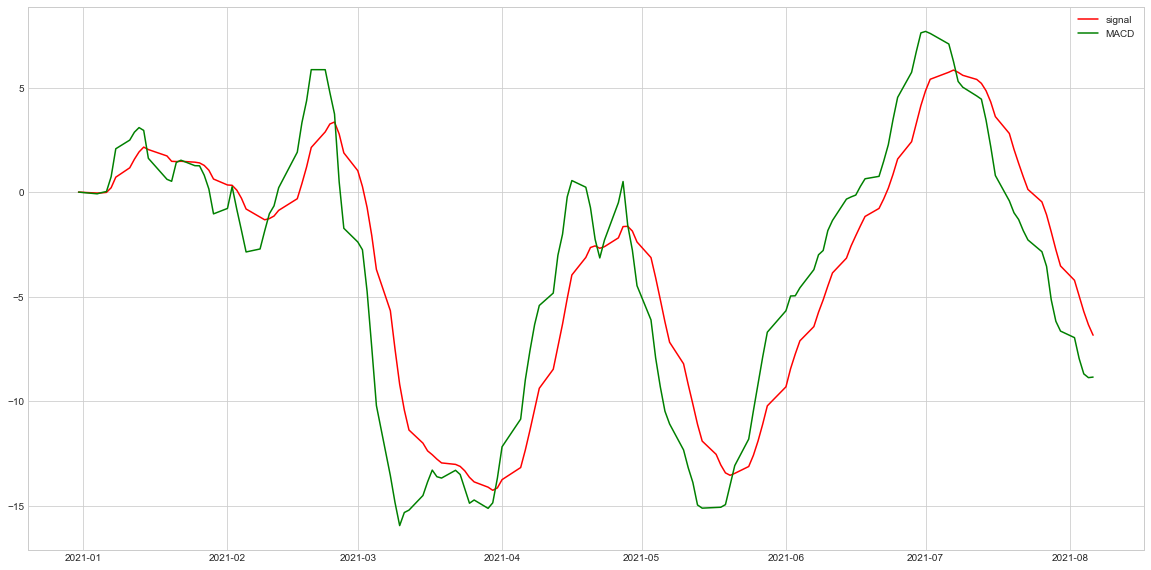

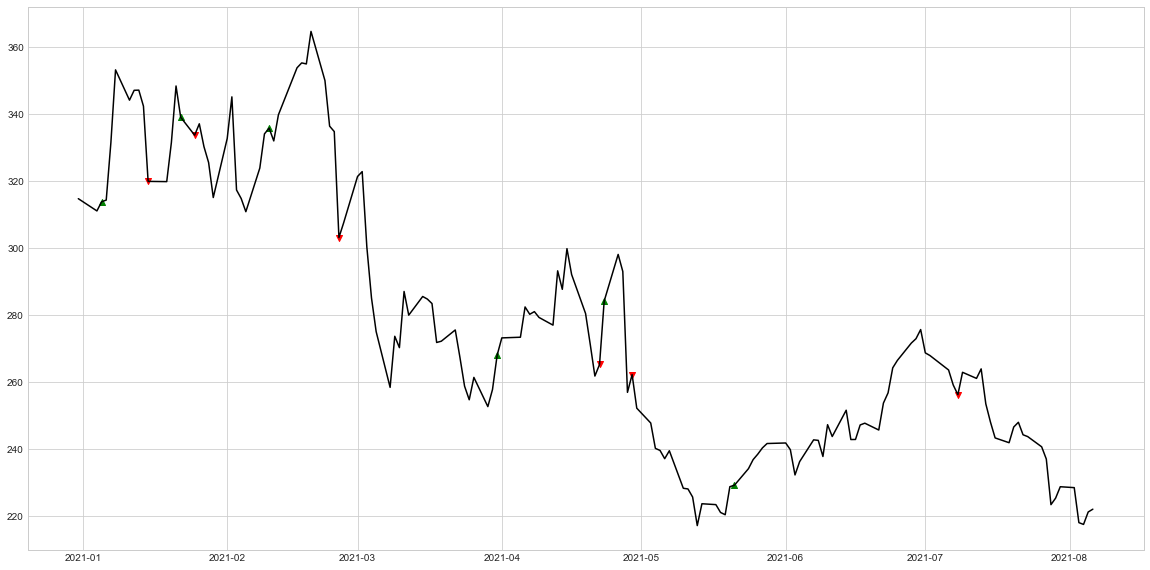

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import pandas as pd
plt.style.use("seaborn-whitegrid")

df = yf.download('SPOT', start = '2021-01-01')

def MACD(df):
    df['EMA12'] = df.Close.ewm(span = 12).mean()
    df['EMA26'] = df.Close.ewm(span = 26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span = 9).mean()
    print('indicators added')
    
    
MACD(df)


plt.figure(figsize=(20,10))

plt.plot(df.signal, label = 'signal', color = 'red')
plt.plot(df.MACD, label = 'MACD', color = 'green')
plt.legend()
plt.show()

Buy, Sell = [], []

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)  
        
        
plt.figure(figsize=(20,10))

plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker = "^", color = 'green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker = "v", color = 'red')
plt.plot(df.Close, color = 'k')

plt.show()        